In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
d = pd.read_csv("clean.csv")

In [41]:
pd.options.display.max_rows=3000
#print(d)
print(d.tail(10))
pd.options.display.max_rows=20

            Date  Mileage time_corr  pace_min   test
2373  2019-11-24    14.00   1:37:02  6.930952  False
2374  2019-11-27     5.02   0:36:08  7.197875  False
2375  2019-11-28     6.15   0:42:22  6.888889  False
2376  2019-11-29     6.26   0:46:15  7.388179  False
2377  2019-11-30     3.11   0:15:44  5.058950   True
2378  2019-11-30     4.90       NaN       NaN  False
2379  2019-12-03     7.28   0:53:04  7.289377  False
2380  2019-12-04     9.58       NaN       NaN  False
2381  2019-12-05     7.00   0:50:33  7.221429  False
2382  2019-12-06     4.09   0:27:53  6.817441  False


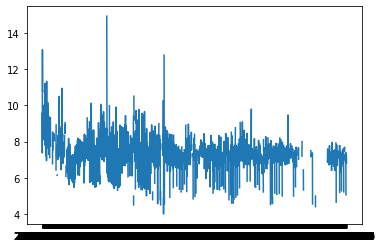

In [36]:
plt.plot(d['Date'], d['pace_min'])
plt.show()

(array([  40.,  121.,  358., 1025.,  215.,   42.,   11.,    2.]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 8 Patch objects>)

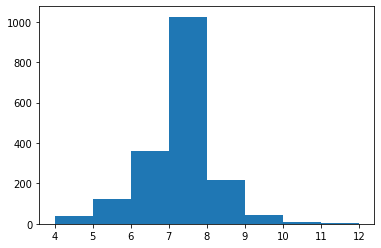

In [42]:
plt.hist(d['pace_min'], bins = [4,5,6,7,8,9,10,11,12])

In [43]:
d['test'] = d['Mileage'].apply(lambda x: 'True' if x <= 3.11 and x > 3.09 else 'False')
print(d)

            Date  Mileage time_corr   pace_min   test
0     2009-04-25     3.10   0:29:38   9.559140   True
1     2009-11-21     3.10   0:22:51   7.370968   True
2     2010-01-04     1.30   0:17:00  13.076923  False
3     2010-01-05     2.60   0:28:00  10.769231  False
4     2010-01-07     2.60   0:28:00  10.769231  False
5     2010-01-11     1.30       NaN        NaN  False
6     2010-01-14     2.60   0:26:00  10.000000  False
7     2010-01-16     4.05   0:35:48   8.839506  False
8     2010-01-19     2.60   0:24:00   9.230769  False
9     2010-01-25     2.66   0:24:15   9.116541  False
...          ...      ...       ...        ...    ...
2373  2019-11-24    14.00   1:37:02   6.930952  False
2374  2019-11-27     5.02   0:36:08   7.197875  False
2375  2019-11-28     6.15   0:42:22   6.888889  False
2376  2019-11-29     6.26   0:46:15   7.388179  False
2377  2019-11-30     3.11   0:15:44   5.058950   True
2378  2019-11-30     4.90       NaN        NaN  False
2379  2019-12-03     7.28   

In [ ]:
k5 = d.apply(lambda x: x['b'] > x['c'], axis=1)]